In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
from sklearn.cluster import KMeans

In [17]:
dataset = pd.read_csv('clientes.csv')
dataset.head(10) #Printing first 10 rows of the dataset

,Id,Genero,Edad,Ingresos anuales (k$),Puntuacion de gasto (1-100)
0,1,Hombre,19,15,39
1,2,Hombre,21,15,81
2,3,Mujer,20,16,6
3,4,Mujer,23,16,77
4,5,Mujer,31,17,40
5,6,Mujer,22,17,76
6,7,Mujer,35,18,6
7,8,Mujer,23,18,94
8,9,Hombre,64,19,3
9,10,Mujer,30,19,72


In [18]:
dataset.shape

(200, 5)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           200 non-null    int64 
 1   Genero                       200 non-null    object
 2   Edad                         200 non-null    int64 
 3   Ingresos anuales (k$)        200 non-null    int64 
 4   Puntuacion de gasto (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
dataset.isnull().sum()

Id                             0
Genero                         0
Edad                           0
Ingresos anuales (k$)          0
Puntuacion de gasto (1-100)    0
dtype: int64

In [21]:
X= dataset.iloc[:, [3,4]].values

In [22]:
wcss=[]

In [23]:
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

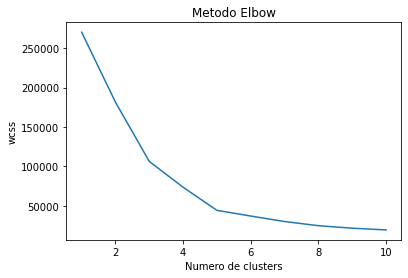

In [25]:
plt.plot(range(1,11), wcss)
plt.title('Metodo Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')
plt.show()

##### Si alejas esta curva, verás que el último codo viene en k = 5
##### no importa qué rango seleccionamos ex- (1,21) también veré el mismo comportamiento pero si elegimos un rango más alto es un poco difícil visualizar el CODO
##### por eso solemos preferir el rango (1,11)
##### Finalmente obtuvimos que k = 5

In [26]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

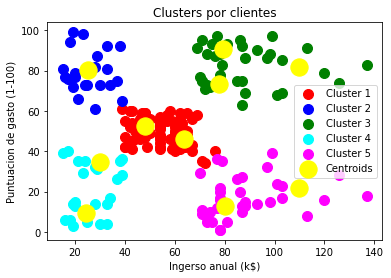

In [28]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters por clientes')
plt.xlabel('Ingerso anual (k$)')
plt.ylabel('Puntuacion de gasto (1-100)')
plt.legend()
plt.show()

### Interpretación del modelo
#### Clúster 1 (color rojo) -> ganar mucho dinero pero gastar menos
#### cluster 2 (Blue Colr) -> promedio en términos de ingresos y gastos
#### cluster 3 (color verde) -> ganar mucho y también gastar mucho [OBJETIVO]
#### cluster 4 (color cian) -> gana menos pero gasta más
#### Cluster 5 (color magenta) -> Ganar menos, gastar menos
###### Podemos poner el Cluster 3 en algún sistema de alerta donde se les pueda enviar un correo electrónico a diario, ya que es fácil conversar con ellos 
#### donde en otros podemos establecer como una vez a la semana o una vez al mes
